In [1]:
from astropy.modeling.models import Sersic2D
import os
import matplotlib as mpl    
import matplotlib.pyplot as plt    
import matplotlib.gridspec
#mpl.rcParams['figure.figsize'] = (10.0, 6.18)
mpl.rcParams['figure.figsize'] = (16, 16)
from astropy.convolution import Gaussian2DKernel

import numpy as np
import astropy.units as u
import astropy.io.fits as pyfits

import grizli.model

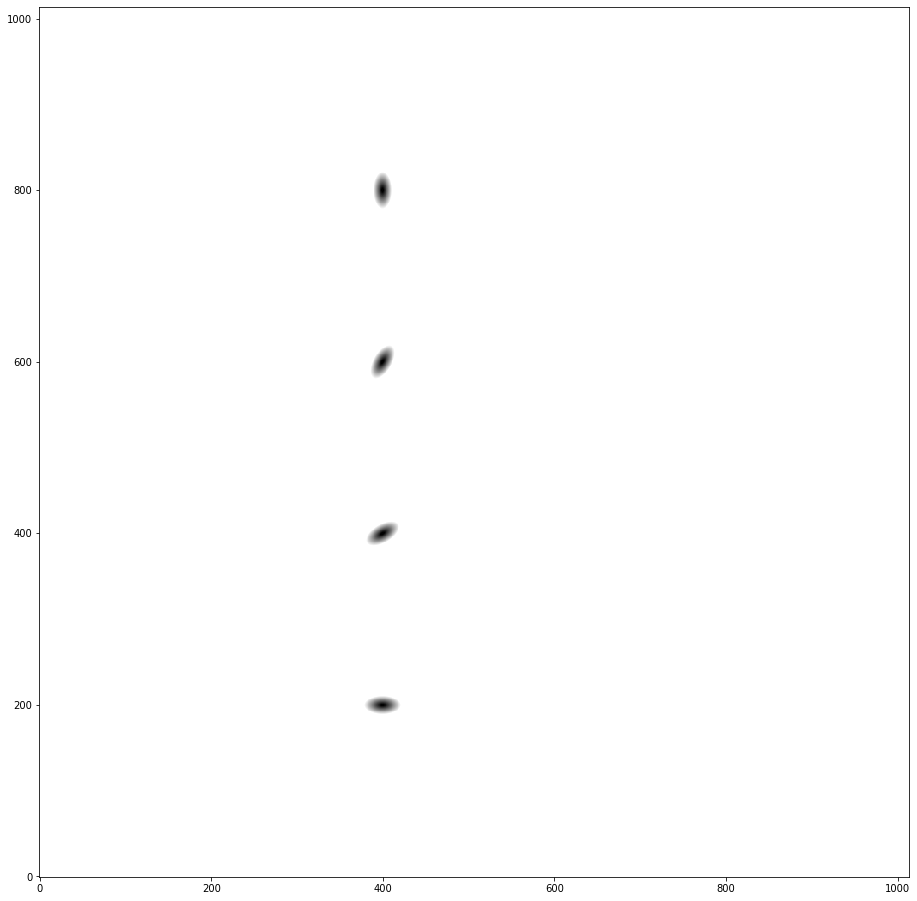

In [2]:
mod=[]
img=[]
imgn=np.zeros([1014,1014])
x,y = np.meshgrid(np.arange(1014), np.arange(1014))
for i in range(4):
        mod = (Sersic2D(amplitude = 5, r_eff = 7, n=1, x_0=400, y_0=200+i*200, ellip=0.5, theta=i*np.pi/6))
        img = (mod(x, y))
        # img[]
        imgn += img

gaussian_2D_kernel = Gaussian2DKernel(10)
# imgn += Gaussian2DKernel(x_stddev=10, y_stddev=10, theta=0.0, x_size=1014,y_size=1014)
plt.imshow(np.log10(imgn), origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.show()

In [3]:
d141 = pyfits.open('/Users/rain/grizli/examples/direct.fits')

In [4]:
d141[1].data = imgn

In [5]:
d141.writeto('/Users/rain/emulator/direct.fits',overwrite=True)

In [73]:
d141[1].data.shape[0]

1014

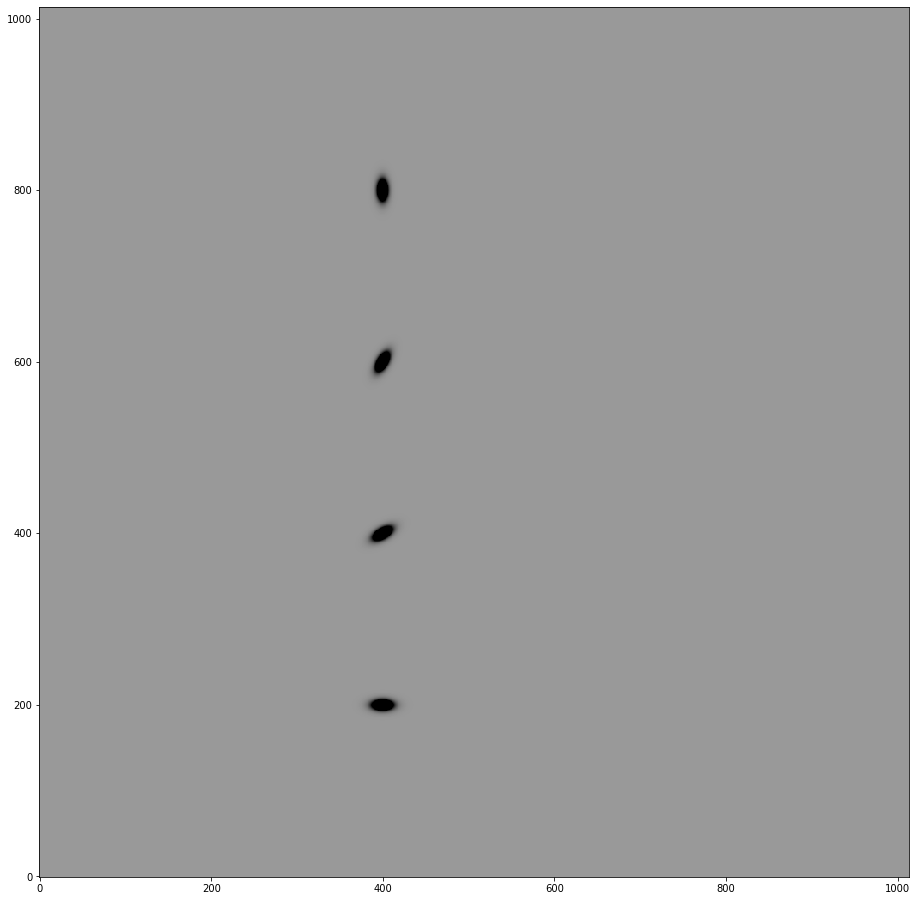

In [6]:
plt.imshow(d141[1].data,origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')

In [7]:
sim_g141 = grizli.model.GrismFLT(direct_file='/Users/rain/emulator/direct.fits', pad=0,force_grism='G141')

In [8]:
sim_g141.photutils_detection(detect_thresh=2, grow_seg=5, gauss_fwhm=2., 
                             verbose=True, save_detection=True,ZP=None)

/Users/rain/emulator/direct: photutils.detect_sources (detect_thresh=2.0, grow_seg=5, gauss_fwhm=2.0, ZP=26.5)
/Users/rain/emulator/direct: photutils.source_properties
Rename column: xcentroid -> x_flt
Rename column: ycentroid -> y_flt
/Users/rain/emulator/direct: photutils.source_properties - 4 objects
/Users/rain/emulator/direct: save /Users/rain/emulator/direct.detect_seg.fits, /Users/rain/emulator/direct.detect.cat


True

In [9]:
keep = sim_g141.catalog['mag'] < 21
c = sim_g141.catalog

sim_g141.compute_full_model(ids=c['id'][keep], mags=c['mag'][keep])

In [94]:
sim_g141.object_dispersers[1][2]['A']

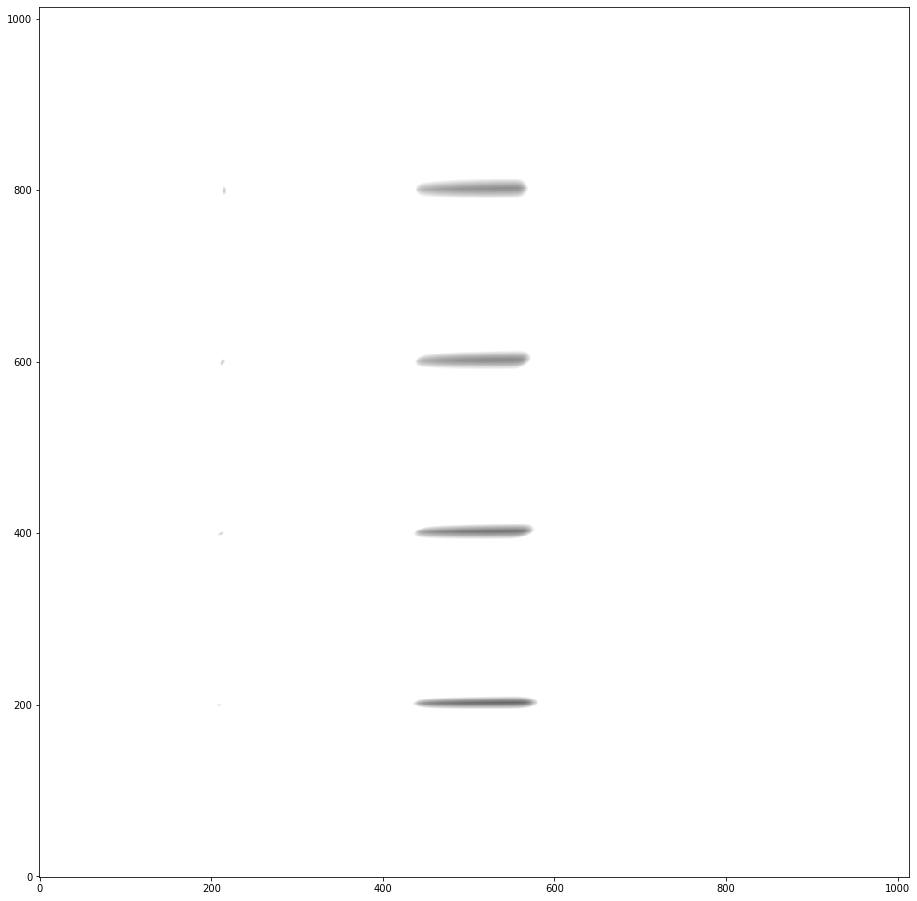

In [10]:
plt.imshow(np.log10(sim_g141.model),origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')

(-0.5, 299.5, -0.5, 99.5)

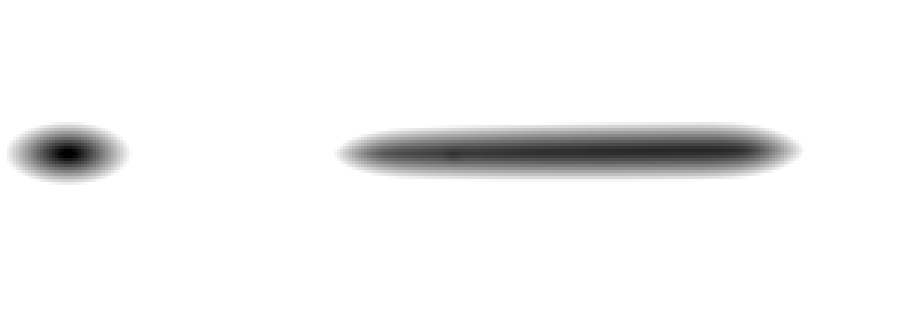

In [11]:
plt.imshow(np.log10(imgn[150:250,380:680]+3.3*sim_g141.model[152:252,320:620]+20*Gaussian2DKernel(x_stddev=1.5, y_stddev=2, theta=-np.pi/2, x_size=300,y_size=100).array),origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

(-0.5, 299.5, -0.5, 99.5)

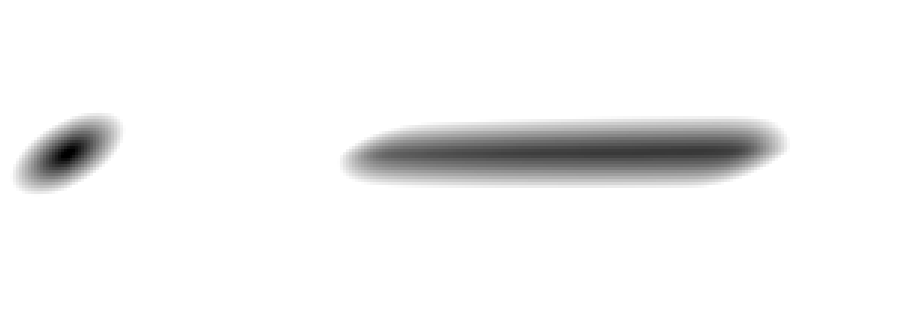

In [21]:
plt.imshow(np.log10(imgn[350:450,380:680]+3.2*sim_g141.model[352:452,320:620]),origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')
#+300*Gaussian2DKernel(x_stddev=2, y_stddev=4, theta=-np.pi/3, x_size=300,y_size=100).array

(-0.5, 299.5, -0.5, 99.5)

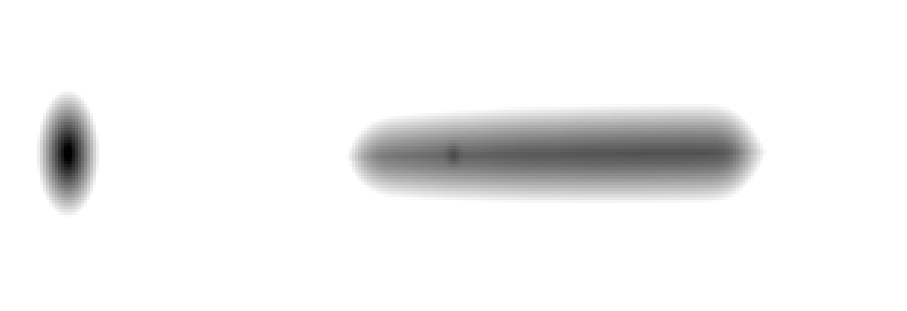

In [23]:
plt.imshow(np.log10(imgn[550:650,380:680]+3.1*sim_g141.model[552:652,320:620]+26*Gaussian2DKernel(x_stddev=1.5, y_stddev=2, theta=-np.pi/6, x_size=300,y_size=100).array),origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

(-0.5, 299.5, -0.5, 99.5)

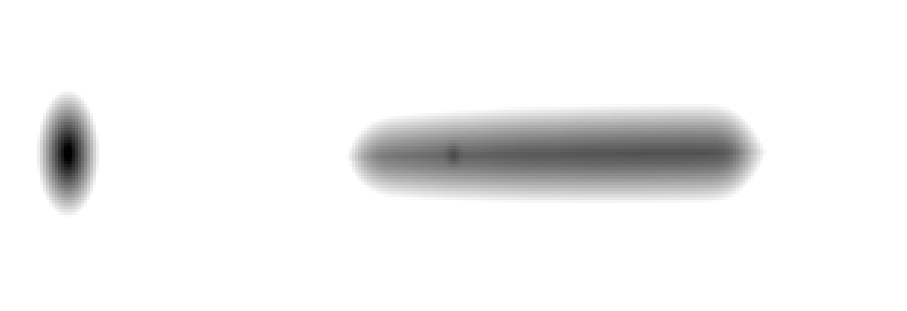

In [24]:
plt.imshow(np.log10(imgn[750:850,380:680]+3*sim_g141.model[752:852,320:620]+30*Gaussian2DKernel(x_stddev=1.5, y_stddev=2, theta=0, x_size=300,y_size=100).array),origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

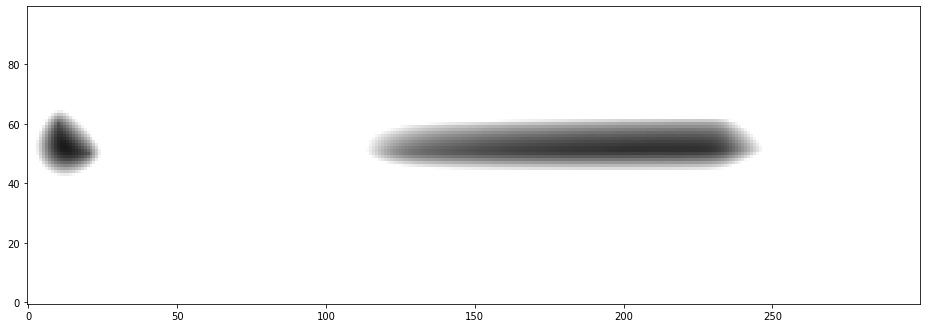

In [38]:
plt.imshow(np.log10(imgn[740:840,390:690]+3*sim_g141.model[742:842,330:630]) + np.log10(imgn[150:250,380:680]+3.3*sim_g141.model[152:252,320:620]),origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')

(-0.5, 99.5, -0.5, 99.5)

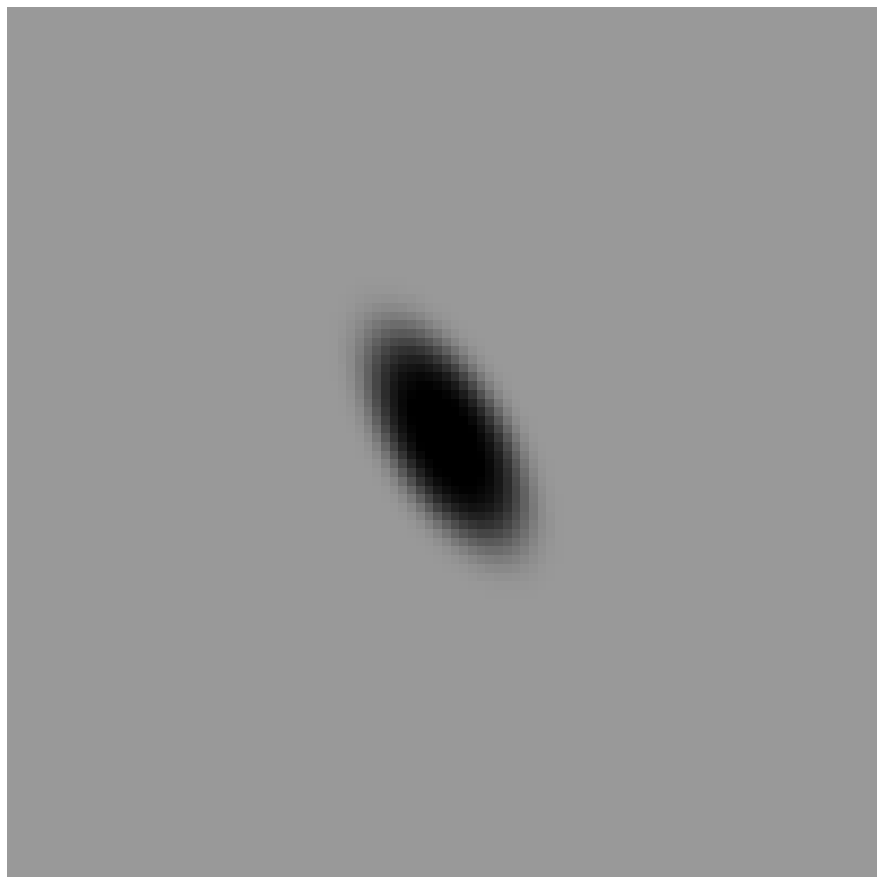

In [216]:
mod=[]
img=[]
x,y = np.meshgrid(np.arange(100), np.arange(100))

mod = Sersic2D(amplitude = 1, r_eff = 9.47, n=0.24, x_0=50, y_0=50, ellip=0.53, theta=-59.7*np.pi/180)
img = mod(x, y)
# img[]
plt.imshow((img), origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

(-0.5, 99.5, -0.5, 99.5)

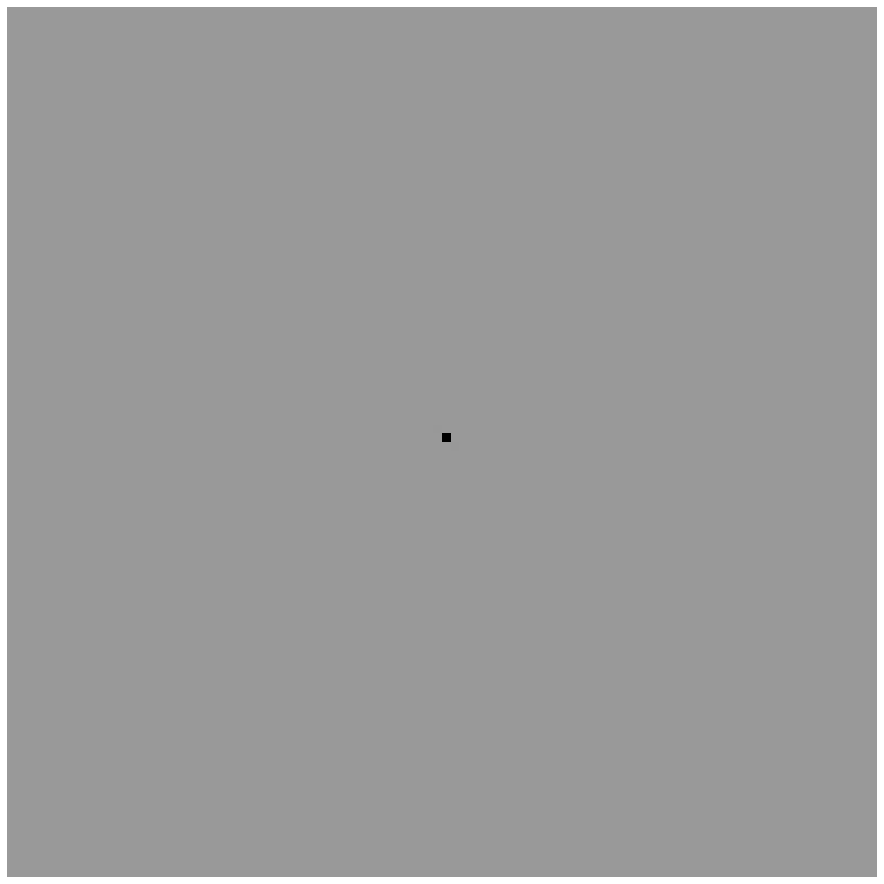

In [217]:
mod=[]
img=[]
x,y = np.meshgrid(np.arange(100), np.arange(100))

mod = Sersic2D(amplitude = 1, r_eff = 0.3, n=4.21, x_0=50, y_0=50, ellip=0.95, theta=-42.2*np.pi/180)
img = mod(x, y)
# img[]
plt.imshow((img), origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

(-0.5, 99.5, -0.5, 99.5)

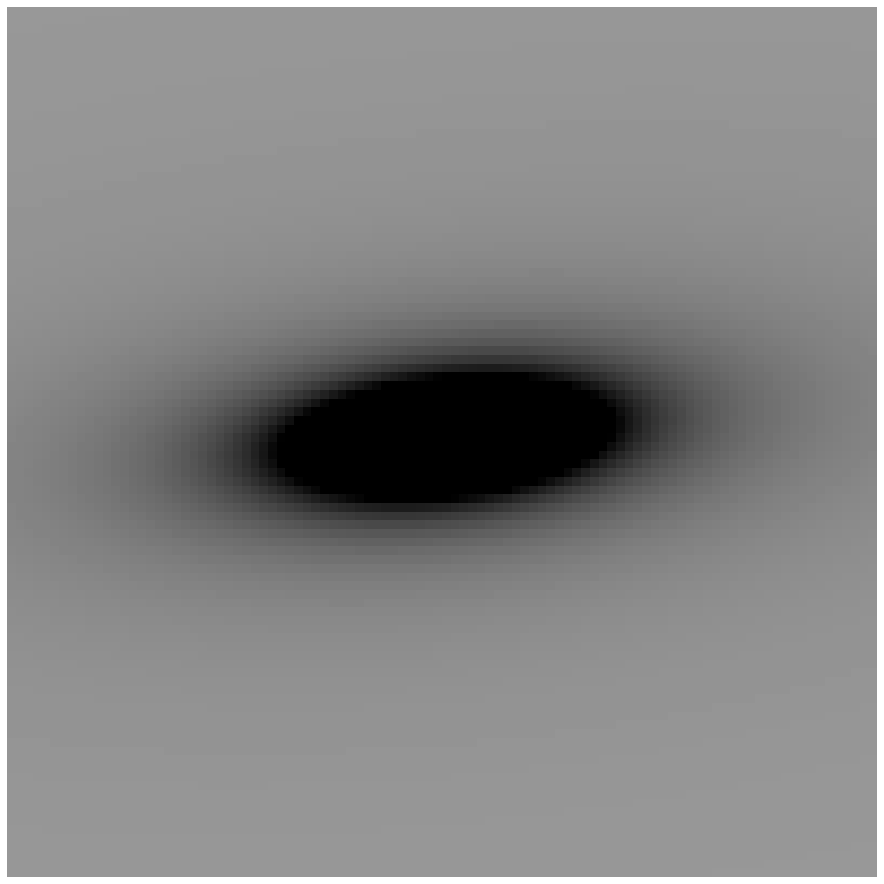

In [218]:
mod=[]
img=[]
x,y = np.meshgrid(np.arange(100), np.arange(100))

mod = Sersic2D(amplitude = 1, r_eff = 21.33, n=6.82, x_0=50, y_0=50, ellip=0.64, theta=5.5*np.pi/180)
img = mod(x, y)
# img[]
plt.imshow((img), origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

(-0.5, 99.5, -0.5, 99.5)

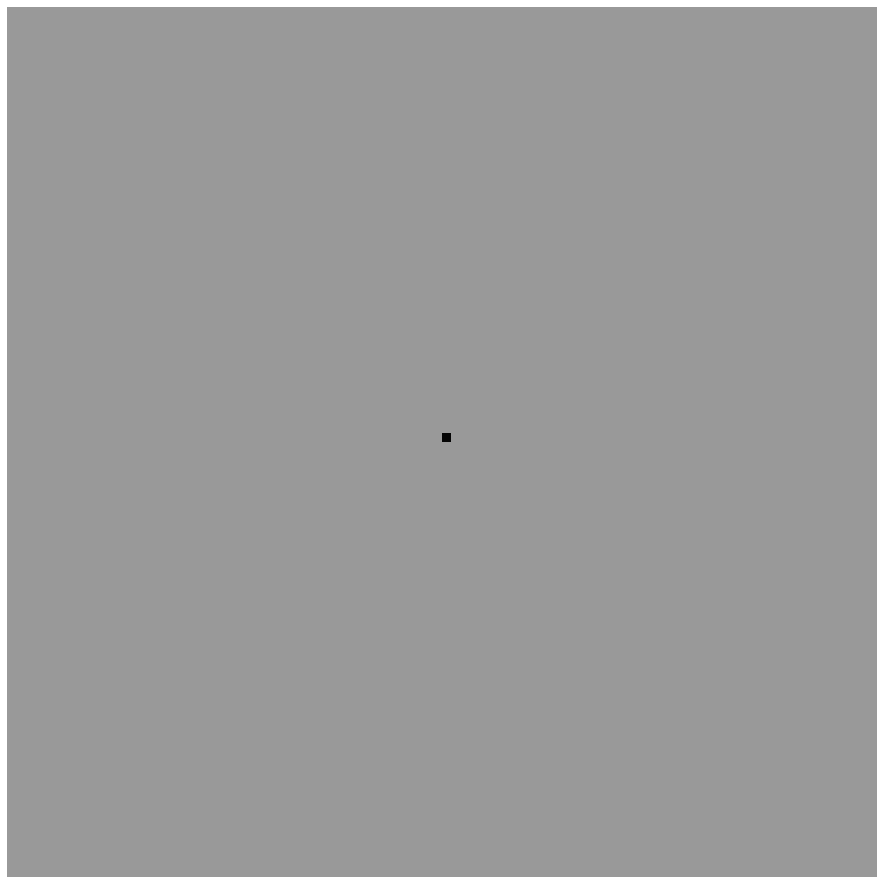

In [221]:
mod=[]
img=[]
x,y = np.meshgrid(np.arange(100), np.arange(100))

mod = Sersic2D(amplitude = 1, r_eff = 0.3, n=0.2, x_0=50, y_0=50, ellip=0.7, theta=-47.5*np.pi/180)
img = mod(x, y)
# img[]
plt.imshow((img), origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

(-0.5, 49.5, -0.5, 49.5)

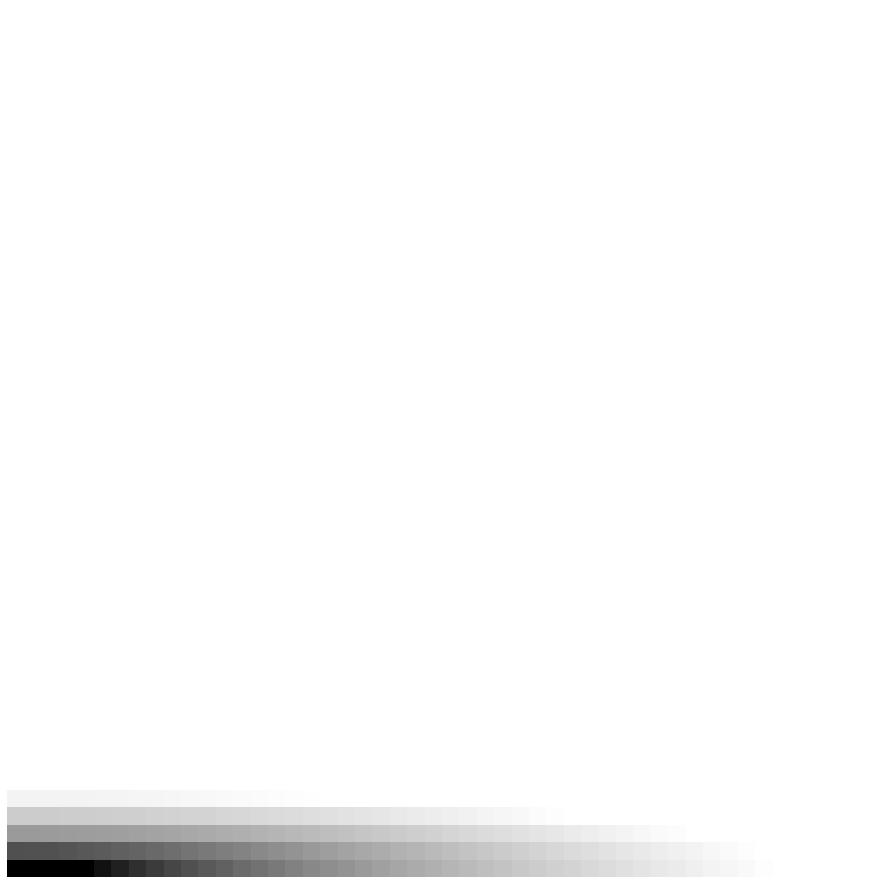

In [249]:
mod=[]
img=[]
x,y = np.meshgrid(np.arange(50), np.arange(50))

mod = Sersic2D(amplitude = 2, r_eff = 14, n=4, x_0=0, y_0=0, ellip=0.9, theta=0*np.pi/180)
img = mod(x, y)
# img[]
plt.imshow(np.log10(img), origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

In [252]:
halfwidth = img.sum(axis=0)
halfheight = img.sum(axis=1)
mask1 = halfwidth > 2
mask2 = halfheight > 2
width = np.hstack([halfwidth[mask1][::-1][:-1],halfwidth[mask1][1]+1,halfwidth[mask1][1:]])
height = np.hstack([halfheight[mask2][::-1][:-1],halfheight[mask2][1]+1,halfheight[mask2][1:]])


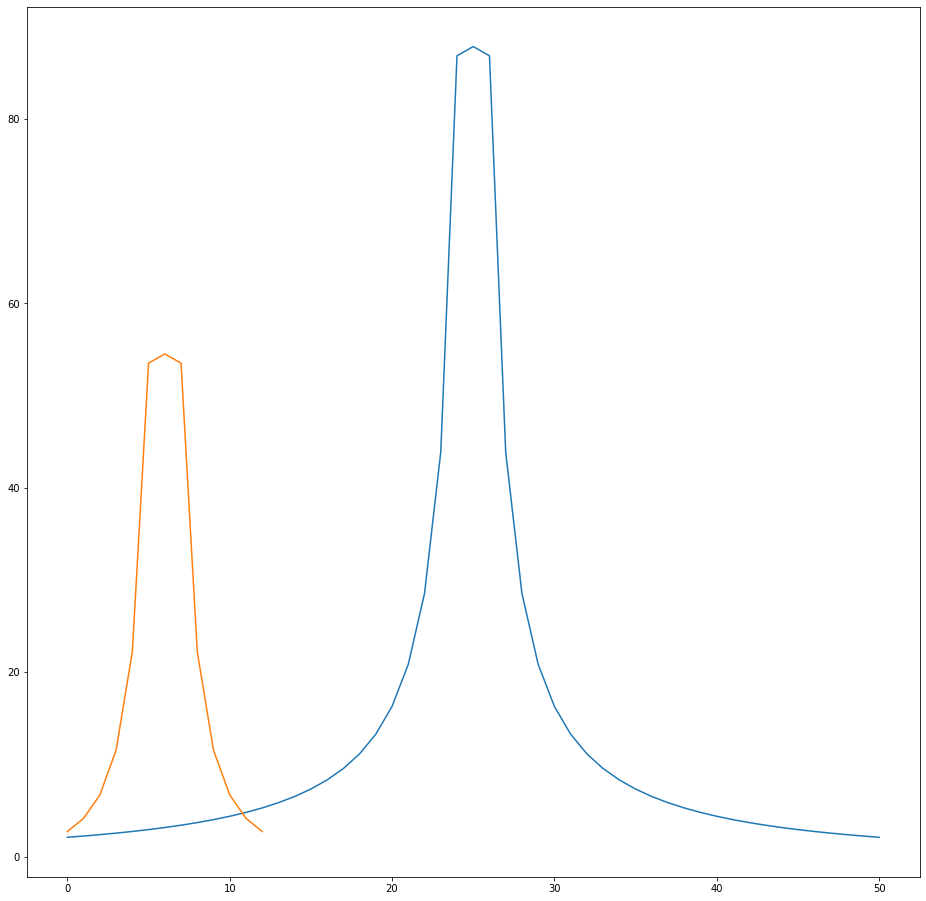

In [253]:
plt.plot(width)
plt.plot(height)

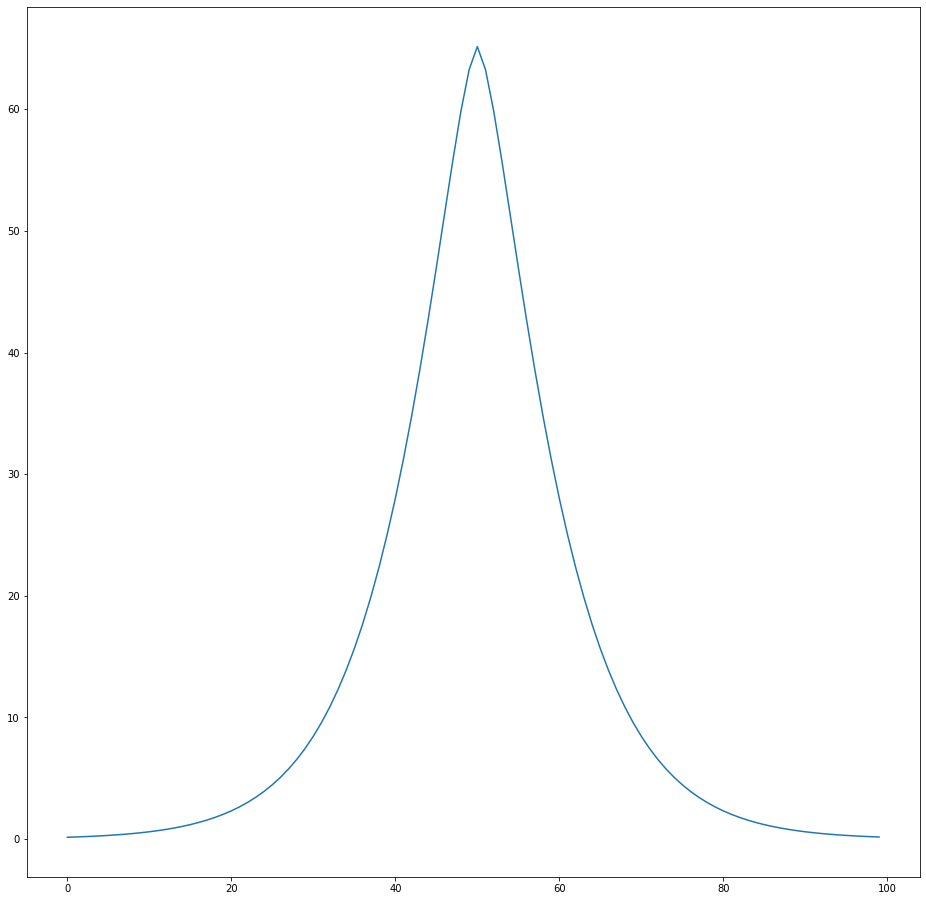

(-0.5, 299.5, -0.5, 99.5)

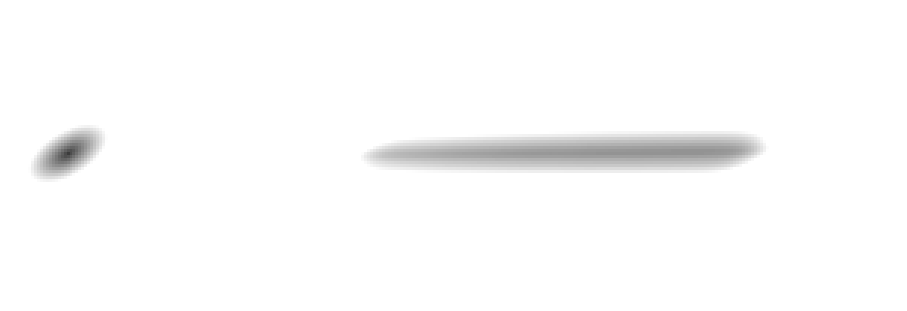

In [254]:
plt.imshow(np.log10(imgn[350:450,380:680]+3.2*sim_g141.model[352:452,320:620]),origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')
plt.axis('off')

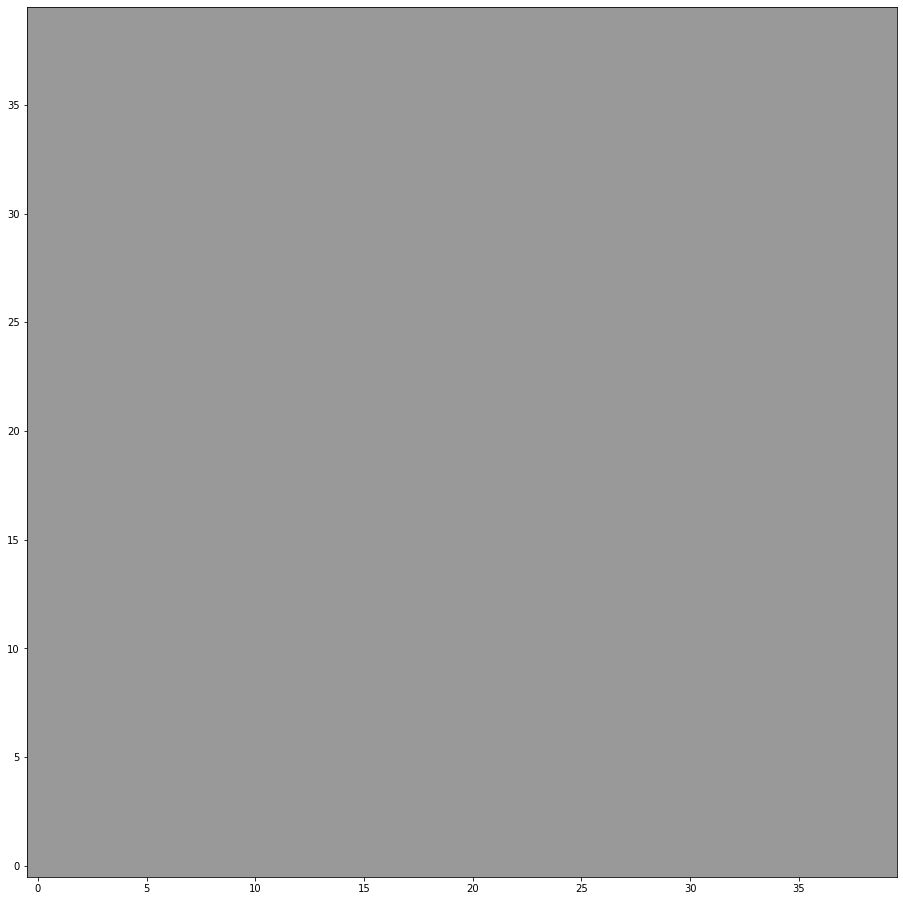

In [266]:
plt.imshow(imgn[180:220,180:220],origin='lower', interpolation='nearest',vmin=-0.8, vmax=1.2, cmap='gray_r')

(-2.5500000000000003, 53.55, 0.0, 240.0)

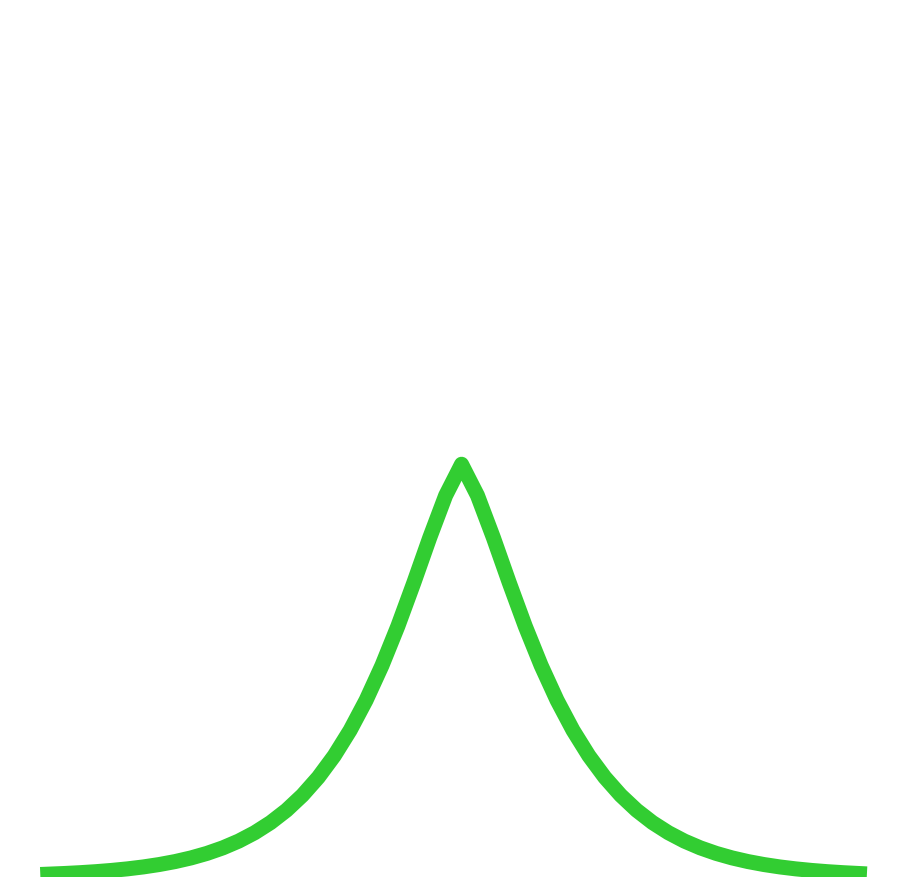

In [69]:
halfwidth = imgn[174:226,374:426].sum(axis=0)
halfheight = imgn[185:215,385:415].sum(axis=1)
plt.plot(halfwidth,color='limegreen',linewidth=15)
plt.ylim(0,240)
plt.axis('off')

In [47]:
52/2

26.0

(-1.4500000000000002, 30.45, 0.0, 240.0)

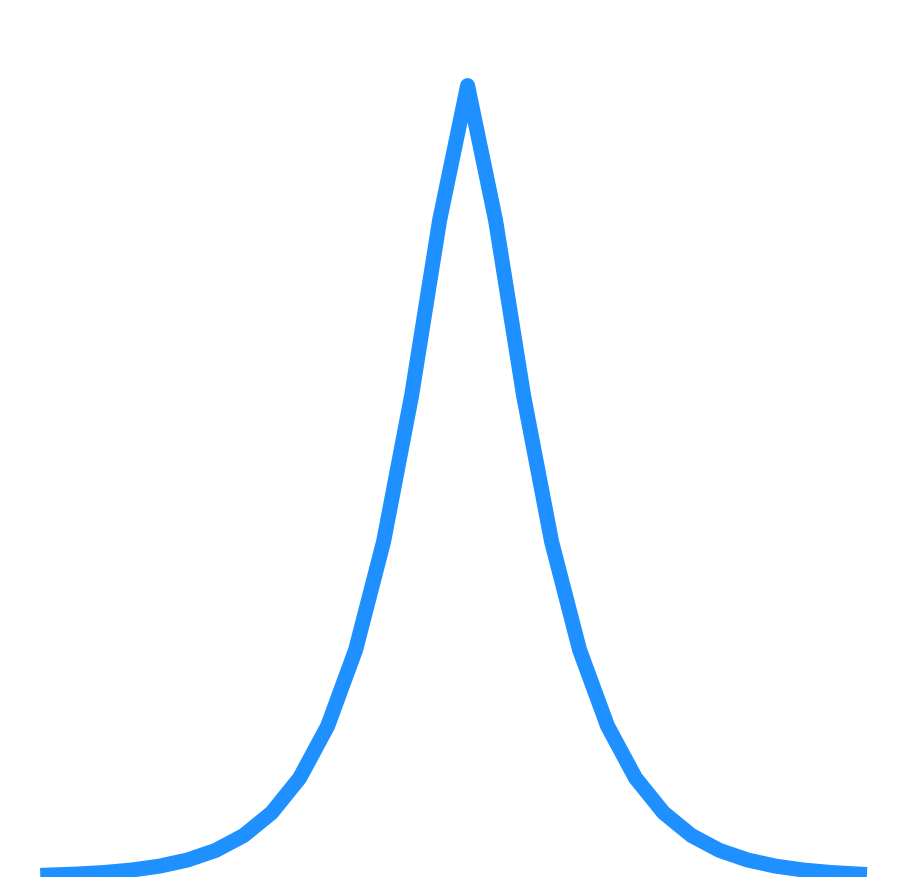

In [68]:
plt.plot(halfheight,color='dodgerblue',linewidth=15)
plt.ylim(0,240)
plt.axis('off')

In [275]:
np.argsort(width)

array([ 0, 50,  1, 49,  2, 48,  3, 47,  4, 46, 45,  5,  6, 44, 43,  7, 42,
        8,  9, 41, 10, 40, 11, 39, 12, 38, 13, 37, 36, 14, 15, 35, 16, 34,
       17, 33, 18, 32, 19, 31, 30, 20, 29, 21, 28, 22, 23, 27, 26, 24, 25])

In [77]:
np.log10(imgn[350:450,380:680]+3.2*sim_g141.model[352:452,320:620]).shape[1]

300